In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [33]:
thickness = np.array([6.8,6.9,7,7.1,7.2,7.3,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,9,9.5,10,10.5,11,11.5,12])
conductivities = np.array([265.833826,385.7487136,2604.55289,4409.948758,10921.54655,28455.23483,69184.21053,208193.4423,254429.239,312497.7106,318725.4784,318356.2226,335227.9939,365347.3533,371496.1423,386801.3937,403764.7059,462033.3015,509885.3664,546978.8551,572884.4221,592157.0856,608776.6351,619750.558])
cond_scaled = conductivities / 1e5

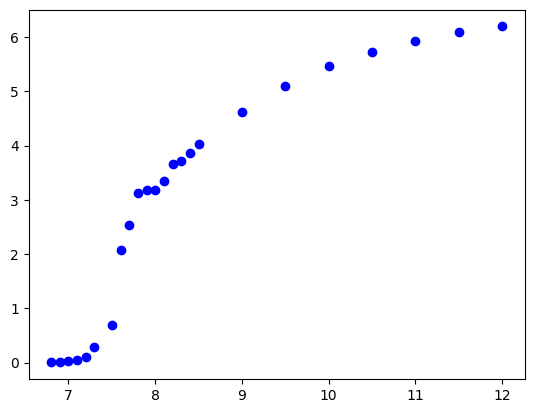

In [7]:
plt.scatter(thickness, cond_scaled, color='blue')

In [50]:
# Fit function
def f(x,sigma,t_0,a):
    f_vals = np.empty(len(x))
    f_vals[x < t_0] = 0
    f_vals[x >= t_0] = sigma * (x[x >= t_0]/t_0 - 1)**(a)

    return f_vals

popt, pcov = curve_fit(f, thickness, cond_scaled, p0=[10,7,1])

Text(0.5, 0, 'Thickness [nm]')

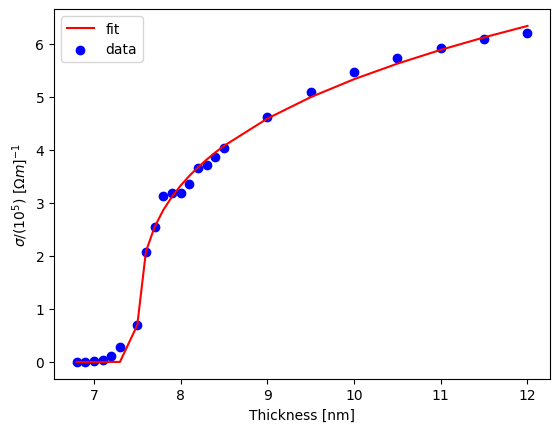

In [57]:
f(thickness, 2, 7.2, 1.5)
plt.plot(thickness, f(thickness, *popt),color='red',label='fit')
plt.scatter(thickness, cond_scaled, color='blue',label='data')
plt.legend()
plt.ylabel(r'$\sigma/(10^5)$ $[\Omega m]^{-1}$')
plt.xlabel('Thickness [nm]')

In [52]:
print(*popt)

7.364202589671037 7.497573466619757 0.2939544501850308
